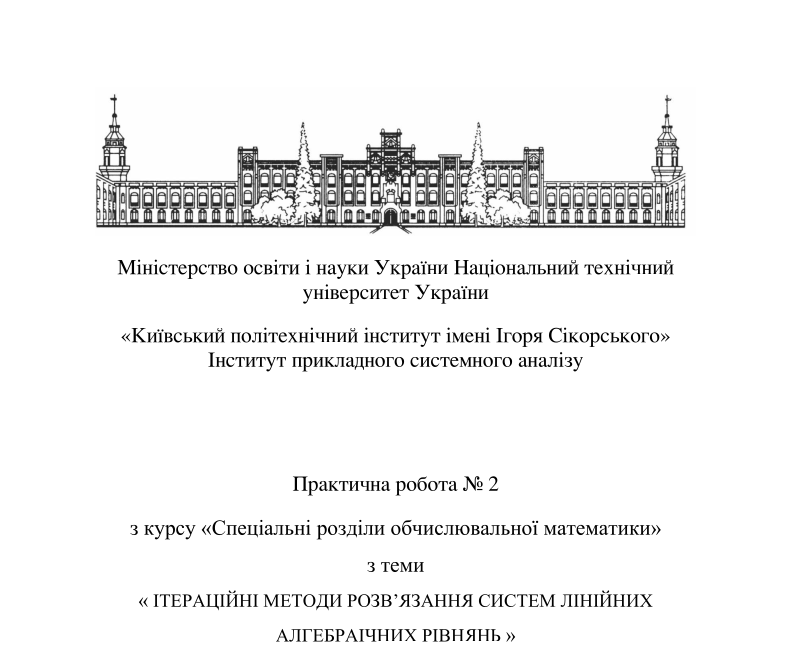

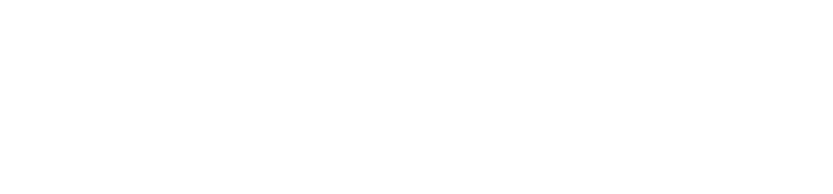

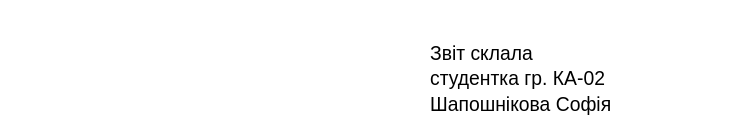

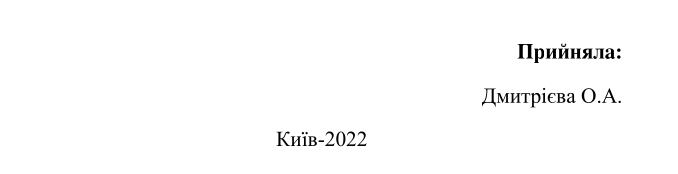

**Мета роботи**: придбання практичних навичок в застосуванні наближених
методів розв’язання систем лінійних алгебраїчних рівнянь. Визначення трудомісткості 

застосованих методів і швидкості збіжності ітераційного
процесу, проведення порівняльного аналізу щодо обрання кращого методу
розв’язання.

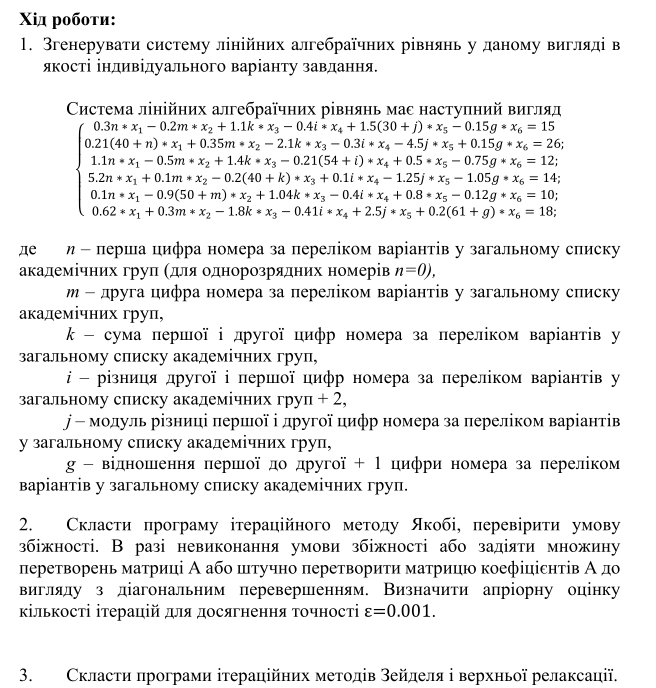

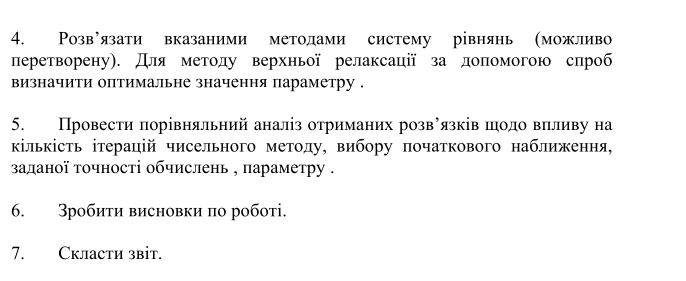

Варіант № 27

In [1]:
import numpy as np

In [2]:
def print_matr(A):
    for eq_l in A:
        for l_el in eq_l:
            print(round(l_el,3), end='    ')
        print()

In [3]:
variant = 27
n = 2
m = 7

k = m+n
i = m-n+2
j = abs(m-n)
g = n/m +1

In [4]:
print('k =',k,', i =', i,', j =', j,', g =', g)

k = 9 , i = 7 , j = 5 , g = 1.2857142857142856


Отримаємо таку систему лінійних алгебраїчних рівнянь:

In [5]:
eq = np.array([[0.3*(n + 1), -0.2*m, 1.1*k, -0.4*i, 1.5*(30 + j), -0.15*g],
                [0.21*(40 + n), 0.35*m, -2.1*k,  -0.3*i, -4.5*j,  0.15*g],
                [1.1*n, -0.5*m, 1.4*k, -0.21*(54 + i), 0.5, -0.75*g],
                [5.2*n, 0.1*m, -0.2*(40 + k), 0.1*i , -1.25*j, -1.05*g],
                [0.1*n, -0.9*(50 + m), 1.04*k, -0.4*i, 0.8, -0.12*g],
                [0.62, 0.3*m, -1.8*k, -0.41*i, 2.5*j, 0.2*(61 + g)]])

Матриця A даної системи має наступний вигляд:

In [6]:
print_matr(eq)

0.9    -1.4    9.9    -2.8    52.5    -0.193    
8.82    2.45    -18.9    -2.1    -22.5    0.193    
2.2    -3.5    12.6    -12.81    0.5    -0.964    
10.4    0.7    -9.8    0.7    -6.25    -1.35    
0.2    -51.3    9.36    -2.8    0.8    -0.154    
0.62    2.1    -16.2    -2.87    12.5    12.457    


Вектор вільних членів:

In [7]:
f = [15,26,12,14,10,18]

In [8]:
print(len(f))

6


Матриця має **діагональне перевершення**, якщо для кожного рядку, величина діагонального елементу кожного рядка 

більша або дорівнює сумі величин усіх інших (недіагональних) елементів цього рядка. Точніше, у матриці A

панівна діагональ якщо:

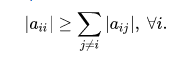

2. Бачимо, що матриця А не має діагонального перевершення, а й отже
умова збіжності не виконується. 

Штучно перетворимо матрицю
коефіцієнтів А до вигляду з діагональним перевершенням 

(змінимо
елементи на головній діагоналі, аби вони були більшими за суму модулів
інших елементів матриці в рядку).

In [9]:
A1 = np.array([[96.9, -0.2*m, 1.1*k, -0.4*i, 1.5*(30 + j), -0.15*g],
      [0.21*(40 + n), 72.8, -2.1*k,  -0.3*i, -4.5*j,  0.15*g],
      [1.1*n, -0.5*m, 40, -0.21*(54 + i), 0.5, -0.75*g],
      [5.2*n, 0.1*m, -0.2*(40 + k), 58.6, -1.25*j, -1.05*g],
      [0.1*n, -0.9*(50 + m), 1.04*k, -0.4*i, 93.9, -0.12*g],
      [0.62, 0.3*m, -1.8*k, -0.41*i, 2.5*j, 74.5]])

Отримали матрицю А:

In [10]:
print_matr(A1)

96.9    -1.4    9.9    -2.8    52.5    -0.193    
8.82    72.8    -18.9    -2.1    -22.5    0.193    
2.2    -3.5    40.0    -12.81    0.5    -0.964    
10.4    0.7    -9.8    58.6    -6.25    -1.35    
0.2    -51.3    9.36    -2.8    93.9    -0.154    
0.62    2.1    -16.2    -2.87    12.5    74.5    


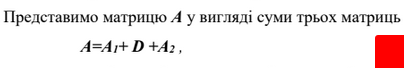

D – діагональна матриця з тією ж діагоналлю, що і матриця А, 

матриця А1 – нижня трикутна матриця з нульовими головними діагоналями.

матриця А2 – верхня трикутна з нульовими головними діагоналями.

A1=A2+D, де D-діагональна матриця, A2=A1-D

In [11]:
D1 = np.diagflat(np.diag(A1))

In [12]:
print_matr(D1)

96.9    0.0    0.0    0.0    0.0    0.0    
0.0    72.8    0.0    0.0    0.0    0.0    
0.0    0.0    40.0    0.0    0.0    0.0    
0.0    0.0    0.0    58.6    0.0    0.0    
0.0    0.0    0.0    0.0    93.9    0.0    
0.0    0.0    0.0    0.0    0.0    74.5    


In [13]:
A2 = A1-D1

In [14]:
print_matr(A2)

0.0    -1.4    9.9    -2.8    52.5    -0.193    
8.82    0.0    -18.9    -2.1    -22.5    0.193    
2.2    -3.5    0.0    -12.81    0.5    -0.964    
10.4    0.7    -9.8    0.0    -6.25    -1.35    
0.2    -51.3    9.36    -2.8    0.0    -0.154    
0.62    2.1    -16.2    -2.87    12.5    0.0    


Знаходимо матрицю B та її норму:



In [15]:
B = np.dot(- np.linalg.inv(D1), A2)

In [16]:
print_matr(B)

0.0    0.014    -0.102    0.029    -0.542    0.002    
-0.121    0.0    0.26    0.029    0.309    -0.003    
-0.055    0.088    0.0    0.32    -0.012    0.024    
-0.177    -0.012    0.167    0.0    0.107    0.023    
-0.002    0.546    -0.1    0.03    0.0    0.002    
-0.008    -0.028    0.217    0.039    -0.168    0.0    


np.linalg.norm

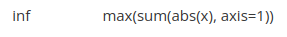

In [17]:
np.linalg.norm(B, np.inf)

0.7213304552590268

Бачимо, що норма <1, а отже умова збіжністі виконується

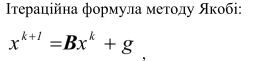

In [18]:
G = np.dot(np.linalg.inv(D1), f)

In [19]:
print(G)

[0.15479876 0.35714286 0.3        0.23890785 0.10649627 0.24161074]


In [20]:
eps = 0.001
ep = 10
k = 0
x = np.ndarray.round(G, decimals = 6)

Запускаємо ітераціний процес методу Якобі:

In [21]:
while ep>eps:
    y = np.dot(B, x) + G
    ep = np.max(abs(y-x))
    print('x = ', x,'ep = ', ep, 'k = ', k)
    x = np.ndarray.round(y, decimals = 6)
    k = k+1

x =  [0.154799 0.357143 0.3      0.238908 0.106496 0.241611] ep =  0.17240384691921506 k =  0
x =  [0.078994 0.455439 0.40374  0.274264 0.2789   0.286825] ep =  0.10147496955624354 k =  1
x =  [-0.022481  0.54574   0.426768  0.323322  0.323551  0.279679] ep =  0.04870524914042301 k =  2
x =  [-0.046317  0.579246  0.45523   0.348701  0.372256  0.277384] ep =  0.028083560518944423 k =  3
x =  [-0.074401  0.605315  0.466937  0.362433  0.388528  0.275632] ep =  0.013541732268370632 k =  4
x =  [-0.083643  0.617186  0.474914  0.370758  0.40207   0.275476] ep =  0.007740006044523073 k =  5
x =  [-0.091383  0.624803  0.478954  0.375031  0.408028  0.275001] ep =  0.0039523276491366666 k =  6
x =  [-0.094791  0.628755  0.481329  0.377614  0.411929  0.274894] ep =  0.002310265777080156 k =  7
x =  [-0.097016  0.631065  0.482638  0.378983  0.413936  0.274773] ep =  0.0012697758830455541 k =  8
x =  [-0.098164  0.632335  0.483373  0.37978   0.415113  0.274727] ep =  0.000716560655416143 k =  9


Отримуємо відповідь: 
* x = [-0.098164  0.632335  0.483373  0.37978   0.415113  0.274727]
* Кількість ітерацій k = 9
* Точність ep = 0.000716560655416143 < 0.001 = 𝑒𝑝𝑠

Знаходимо апріорну оцінку кількості ітерацій для заданого eps:

In [22]:
np.ceil((np.log(eps)-np.log(np.max(abs(G-x))))/np.log(0.8625))

39.0

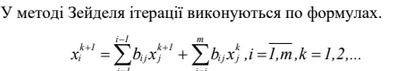

In [23]:
ep,k = 10,0
x = np.ndarray.round(G, decimals = 6)

In [24]:
for j1, g1 in enumerate(G):
        y = g1+np.sum([B[j1, i1]*x[i1] for i1 in range(len(G))])
        ep = max(abs(y-x[j1]), ep)
        x[j1] = y
k = k+1
print('x = ', x,'ep = ', ep, 'k = ', k)

while ep > eps and k< 100:
    ep=0
    for j1, g1 in enumerate(G):
        y = g1+np.sum([B[j1, i1]*x[i1] for i1 in range(len(G))])
        ep = max(abs(y-x[j1]), ep)
        x[j1] = y
    k = k+1
    print('x = ', x,'ep = ', ep, 'k = ', k)

x =  [0.0789938  0.46462287 0.41731348 0.30605248 0.32808865 0.27534304] ep =  10 k =  1
x =  [-0.04948954  0.58097975  0.45410759  0.35802947  0.38986875  0.27276985] ep =  0.12848334244857657 k =  2
x =  [-0.08354298  0.61525805  0.47479122  0.37365255  0.40706829  0.2743007 ] ep =  0.034278298208137326 k =  3
x =  [-0.09402507  0.62766018  0.48127813  0.37831923  0.41336127  0.27457282] ep =  0.012402135384674828 k =  4
x =  [-0.09778275  0.63187838  0.48327629  0.37994735  0.41552361  0.2746196 ] ep =  0.004218200753868917 k =  5
x =  [-0.09905036  0.63326586  0.48396292  0.38050227  0.4162325   0.27464279] ep =  0.0013874752621259034 k =  6
x =  [-0.09946846  0.63372981  0.48419592  0.38068604  0.41646915  0.27465123] ep =  0.0004639542545452624 k =  7


Кількість ітерацій порівняно з методом Якобі зменшилась.

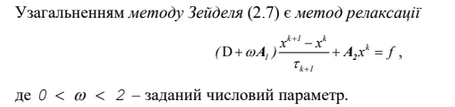

A1-не симетрична, тому для забезпечення збіжності проведемо її
симетрізацию і, відповідно, перетворимо праву частину f

In [25]:
np.linalg.det(A1)

82213072992.00647

Отже, детермінант не дорівнює нулю

In [26]:
SS = np.dot(A1.T, A1)

In [27]:
print_matr(SS)

9580.827    497.058    770.52    289.077    4851.43    13.011    
497.058    7950.64    -2050.828    74.508    -6508.445    181.105    
770.52    -2050.828    2501.31    -1054.424    1702.654    -1239.24    
289.077    74.508    -1054.424    3626.383    -771.2    -280.006    
4851.43    -6508.445    1702.654    -771.2    12275.273    910.254    
13.011    181.105    -1239.24    -280.006    910.254    5553.101    


In [28]:
ss = np.dot(A1.T, f)

In [29]:
ss

array([1867.98      , 1364.4       , -198.1       ,  490.42      ,
       1285.        , 1311.10714286])

In [30]:
EU = np.identity(6) #одинична матриця розміром 6

In [31]:
DD = np.diagflat(np.diag(SS))

In [32]:
print_matr(DD)

9580.827    0.0    0.0    0.0    0.0    0.0    
0.0    7950.64    0.0    0.0    0.0    0.0    
0.0    0.0    2501.31    0.0    0.0    0.0    
0.0    0.0    0.0    3626.383    0.0    0.0    
0.0    0.0    0.0    0.0    12275.273    0.0    
0.0    0.0    0.0    0.0    0.0    5553.101    


In [33]:
JO = np.tril(SS) - DD

In [34]:
print_matr(JO)

0.0    0.0    0.0    0.0    0.0    0.0    
497.058    0.0    0.0    0.0    0.0    0.0    
770.52    -2050.828    0.0    0.0    0.0    0.0    
289.077    74.508    -1054.424    0.0    0.0    0.0    
4851.43    -6508.445    1702.654    -771.2    0.0    0.0    
13.011    181.105    -1239.24    -280.006    910.254    0.0    


In [35]:
RB = np.dot(np.linalg.inv(DD + JO), SS)

In [36]:
print_matr(RB)

1.0    0.052    0.08    0.03    0.506    0.001    
0.0    0.997    -0.263    0.007    -0.85    0.023    
-0.0    -0.019    0.76    -0.425    -0.172    -0.477    
0.0    -0.009    -0.071    0.874    -0.286    -0.217    
-0.0    -0.02    -0.142    0.043    0.355    0.138    
0.0    -0.001    -0.026    -0.109    0.079    0.859    


In [37]:
AA = EU - RB

In [38]:
print_matr(AA)

0.0    -0.052    -0.08    -0.03    -0.506    -0.001    
-0.0    0.003    0.263    -0.007    0.85    -0.023    
0.0    0.019    0.24    0.425    0.172    0.477    
-0.0    0.009    0.071    0.126    0.286    0.217    
0.0    0.02    0.142    -0.043    0.645    -0.138    
-0.0    0.001    0.026    0.109    -0.079    0.141    


In [39]:
p = np.dot(np.linalg.inv(DD + JO), ss)

In [40]:
p

array([ 0.19497065,  0.15941965, -0.00855012,  0.1139331 ,  0.12049514,
        0.21453309])

In [41]:
def ZR(ww, e):
    ep, k = 10, 0
    x = p
    while ep > e:
        y = np.ndarray.round(np.dot(AA, x)+p, decimals=6)
        ep = max(abs(x-y))
        x = y
        k = k + 1
        print('x = ', x,'ep = ', ep, 'k = ', k)

In [47]:
ZR(1, 0.001)

x =  [0.122644 0.25442  0.163915 0.210083 0.16566  0.247537] ep =  0.17246511797402234 k =  1
x =  [0.078029 0.337015 0.271517 0.255383 0.212559 0.263557] ep =  0.107602 k =  2
x =  [0.039953 0.404753 0.333894 0.286374 0.25563  0.26986 ] ep =  0.06773799999999996 k =  3
x =  [0.008669 0.457623 0.373747 0.309016 0.291453 0.272372] ep =  0.05287000000000003 k =  4
x =  [-0.016105  0.498507  0.401304  0.325975  0.319978  0.273426] ep =  0.040883999999999976 k =  5
x =  [-0.0354    0.529989  0.421314  0.338833  0.34225   0.273907] ep =  0.031482000000000065 k =  6
x =  [-0.050309  0.554183  0.436242  0.348638  0.35948   0.274154] ep =  0.024193999999999938 k =  7
x =  [-0.061786  0.572759  0.447534  0.356138  0.372751  0.274298] ep =  0.018576000000000037 k =  8
x =  [-0.070604  0.587013  0.456137  0.361883  0.382951  0.274392] ep =  0.014253999999999989 k =  9
x =  [-0.077374  0.597949  0.462714  0.366286  0.390783  0.274457] ep =  0.010935999999999946 k =  10
x =  [-0.082569  0.606339  0

Розв’яжемо систему за допомогою вбудованої функції та будемо
вважати цей розв’язок за найточніший

In [45]:
np.linalg.solve(A1, f)

array([-0.09967908,  0.63396406,  0.48431227,  0.38077836,  0.41658876,
        0.27465516])

Перевіримо правильність розв'язків:

In [46]:
np.allclose(np.dot(A1, np.linalg.solve(A1, f)), f)

True

**Висновки**:

* Розв’язок системи за допомогою **вбудованої функції**: x = [-0.09967908,  0.63396406,  0.48431227,  0.38077836,  0.41658876,
        0.27465516]
* Розв’язок системи за допомогою **ітераційного методу Якобі**: x =  [-0.098164  0.632335  0.483373  0.37978   0.415113  0.274727] ep =  0.000716560655416143 k =  9
* Розв’язок системи за допомогою **методу Зейделя**: x =  [-0.09946846  0.63372981  0.48419592  0.38068604  0.41646915  0.27465123] ep =  0.0004639542545452624 k =  7
* Розв’язок системи **методом верхньої релаксації**: x =  x =  [-0.098107  0.631425  0.482791  0.379757  0.414769  0.274641] ep =  0.0007709999999999662 k =  20

Було визначено трудомісткість застосованих методів і швидкість збіжності ітераційного
процесу, проведено порівняльний аналіз щодо обрання кращого методу
розв’язання. 

Найшвидшим методом розв’язання системи виявився метод Зейделя. Всі методи дали точну відповідь при похибці 0.001